In [8]:
import pandas as pds 
import subprocess
import json
import matplotlib.pyplot as plt
import numpy as np

def get_experiments_from_path(start_path):
    experiment_dot_json_paths = subprocess.getoutput('find {} | grep experiment.json'.format(start_path))

    experiment_dot_json_paths = experiment_dot_json_paths.split('\n')
    experiments = []
    for p in experiment_dot_json_paths:
        with open(p) as f:
            experiments.append(json.load(f))
    
    return experiments


def process_ptn_experiments(raw):
    processed = []

    for e in raw:
        p = {}
        p["experiment_name"]  = e["experiment_name"]
        p["source_domains"]  = tuple(map(str, e["parameters"]["source_domains"]))
        p["num_examples_per_class_per_domain_source"]  = e["parameters"]["num_examples_per_class_per_domain_source"]
        for domain,accuracy in e["results"]["per_domain_accuracy"].items():
            p[domain.format(domain)] = accuracy["accuracy"]


        processed.append(p)
    return pds.DataFrame(processed)

def add_target_mean(df):
    means = []
    for index, series in df.iterrows():
        non_source_cols = [i for i in series.index if i not in ["experiment_name", "source_domains", "num_examples_per_class_per_domain_source"]]
        non_source_cols = [i for i in non_source_cols if i not in series["source_domains"]]
        mean = series[ non_source_cols ].mean()
        means.append(mean)
    df["target_mean"] = means
    return df

In [9]:
raw = get_experiments_from_path("../oracle_ptn_1B")

df = process_ptn_experiments(raw)
df = add_target_mean(df)
oracle_ptn_1B = df
oracle_ptn_1B

,experiment_name,source_domains,num_examples_per_class_per_domain_source,26,14,62,50,20,38,56,8,2,44,32,target_mean
0,oracle_ptn_1,"(26,)",1000,0.449479,0.489063,0.443229,0.394271,0.311458,0.475521,0.507292,0.482292,0.340104,0.391146,0.538542,0.437292
1,oracle_ptn_1,"(2,)",1000,0.211979,0.335417,0.375521,0.303646,0.180208,0.390104,0.378125,0.344271,0.472917,0.322396,0.329688,0.317135
2,oracle_ptn_1,"(14,)",1000,0.322396,0.628646,0.533333,0.430729,0.268229,0.542708,0.570312,0.435417,0.244792,0.443750,0.495833,0.428750
3,oracle_ptn_1,"(62,)",1000,0.311979,0.438021,0.794271,0.483854,0.239583,0.635417,0.744271,0.388542,0.277083,0.389062,0.572917,0.448073
4,oracle_ptn_1,"(50,)",1000,0.386458,0.536979,0.591146,0.798438,0.293750,0.715104,0.675000,0.487500,0.346354,0.651042,0.598437,0.528177
5,oracle_ptn_1,"(14,)",1000,0.371875,0.659375,0.586458,0.461458,0.285938,0.570833,0.617188,0.434896,0.257812,0.487500,0.511979,0.458594
6,oracle_ptn_1,"(14,)",1000,0.342708,0.616667,0.441146,0.408854,0.257812,0.477604,0.493229,0.412500,0.244792,0.395833,0.516667,0.399115
7,oracle_ptn_1,"(2,)",1000,0.219792,0.366146,0.432292,0.330208,0.203125,0.420833,0.407813,0.351042,0.446875,0.347396,0.363542,0.344219
8,oracle_ptn_1,"(26,)",1000,0.418229,0.486979,0.513542,0.400521,0.276042,0.500521,0.536458,0.453646,0.322396,0.407292,0.556771,0.445417
9,oracle_ptn_1,"(62,)",1000,0.255208,0.371875,0.790104,0.421354,0.189062,0.549479,0.694271,0.350521,0.231250,0.354687,0.475521,0.389323


In [10]:
raw = get_experiments_from_path("../oracle_ptn_1")

df = process_ptn_experiments(raw)
df = add_target_mean(df)
oracle_ptn_1 = df
oracle_ptn_1

,experiment_name,source_domains,num_examples_per_class_per_domain_source,2,20,62,50,26,38,56,14,8,44,32,target_mean
0,oracle_ptn_1,"(2,)",2000,0.543490,0.184896,0.352865,0.321094,0.219792,0.407031,0.373177,0.316667,0.338021,0.320312,0.346354,0.318021
1,oracle_ptn_1,"(62,)",2000,0.285417,0.230469,0.857552,0.509115,0.275000,0.597656,0.685677,0.429688,0.385417,0.422135,0.541146,0.436172
2,oracle_ptn_1,"(2,)",2000,0.539062,0.169271,0.372656,0.281250,0.229687,0.367708,0.358073,0.335677,0.360677,0.297135,0.324479,0.309661
3,oracle_ptn_1,"(14,)",2000,0.266927,0.332813,0.682813,0.551823,0.432812,0.637760,0.691927,0.754167,0.464583,0.556250,0.630990,0.524870
4,oracle_ptn_1,"(2,)",2000,0.539583,0.174740,0.346875,0.309375,0.221875,0.379427,0.354948,0.318490,0.356510,0.312500,0.345833,0.312057


In [11]:
df = pds.concat( (oracle_ptn_1B, oracle_ptn_1) )
df

,experiment_name,source_domains,num_examples_per_class_per_domain_source,26,14,62,50,20,38,56,8,2,44,32,target_mean
0,oracle_ptn_1,"(26,)",1000,0.449479,0.489063,0.443229,0.394271,0.311458,0.475521,0.507292,0.482292,0.340104,0.391146,0.538542,0.437292
1,oracle_ptn_1,"(2,)",1000,0.211979,0.335417,0.375521,0.303646,0.180208,0.390104,0.378125,0.344271,0.472917,0.322396,0.329688,0.317135
2,oracle_ptn_1,"(14,)",1000,0.322396,0.628646,0.533333,0.430729,0.268229,0.542708,0.570312,0.435417,0.244792,0.443750,0.495833,0.428750
3,oracle_ptn_1,"(62,)",1000,0.311979,0.438021,0.794271,0.483854,0.239583,0.635417,0.744271,0.388542,0.277083,0.389062,0.572917,0.448073
4,oracle_ptn_1,"(50,)",1000,0.386458,0.536979,0.591146,0.798438,0.293750,0.715104,0.675000,0.487500,0.346354,0.651042,0.598437,0.528177
5,oracle_ptn_1,"(14,)",1000,0.371875,0.659375,0.586458,0.461458,0.285938,0.570833,0.617188,0.434896,0.257812,0.487500,0.511979,0.458594
6,oracle_ptn_1,"(14,)",1000,0.342708,0.616667,0.441146,0.408854,0.257812,0.477604,0.493229,0.412500,0.244792,0.395833,0.516667,0.399115
7,oracle_ptn_1,"(2,)",1000,0.219792,0.366146,0.432292,0.330208,0.203125,0.420833,0.407813,0.351042,0.446875,0.347396,0.363542,0.344219
8,oracle_ptn_1,"(26,)",1000,0.418229,0.486979,0.513542,0.400521,0.276042,0.500521,0.536458,0.453646,0.322396,0.407292,0.556771,0.445417
9,oracle_ptn_1,"(62,)",1000,0.255208,0.371875,0.790104,0.421354,0.189062,0.549479,0.694271,0.350521,0.231250,0.354687,0.475521,0.389323


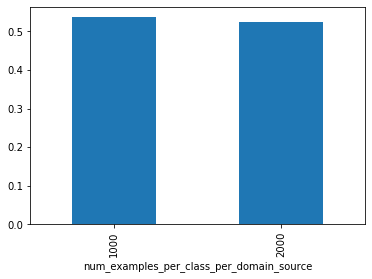

In [13]:
%matplotlib inline
group = df.groupby(["num_examples_per_class_per_domain_source"])

# group["target_mean"].max().plot(kind="bar", ax=plt.subplot(1,2, 1))
# group["target_mean"].mean().plot(kind="bar", ax=plt.subplot(1,2, 2))
group["target_mean"].max().plot(kind="bar")